In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_excel (r'/Users/Mikayla/Desktop/RamenSideProject/The-Ramen-Rater-The-Big-List-1-3400-Current-As-Of-Jan-25-2020.xlsx')
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25


# Data Overview
I downloaded the dataset from https://www.theramenrater.com/. This includes 3400 reviews by various ramen enthusiasts. For each review, they include the brand, variety of ramen, serving style, country, and the rating out of 5 stars. 

# Frequencies
First, I thought it would be hepful to look at the frequencies for each of the main categories (Brand, Variety, Style, and Country). I wanted to know what kind of overlap existed for reviews of certain ramen vaireties. I also wanted to know the most commonly reviewed style and the country doing the most reviewing. 

## Styles
Packs of ramen are more commonly reviewed, followed by bowl, cup, and tray. When looking at data filtered by style, I will primarily focus on these more common types. 

In [46]:
df['Style'].value_counts()

Pack          1948
Bowl           655
Cup            593
Tray           151
Box             48
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

## Brands
I wanted to look at the most commonly reviewed brands, which met my expectation as I am familiar with the 3 most reviewed brands.

In [47]:
df['Brand'].value_counts()

Nissin                                460
Maruchan                              120
Nongshim                              113
Myojo                                  96
Samyang Foods                          93
Paldo                                  76
Mama                                   71
Indomie                                56
Sapporo Ichiban                        54
Ottogi                                 48
Acecook                                41
Maggi                                  38
KOKA                                   36
Vifon                                  35
Lucky Me!                              34
Vina Acecook                           34
MyKuali                                30
MAMA                                   30
Master Kong                            29
Ve Wong                                29
Mamee                                  29
Vedan                                  28
Wei Lih                                26
JML                               

## Countries
Japan reviews the most ramen on this website, as may be expected with ramen's popularity in Japan. This also made me note some inconsistency on country name. There are small counts incorrectly separated due to United States and USA being counted differently as well as United Kingdom and UK. 

In [48]:
df['Country'].value_counts()

Japan             606
United States     419
South Korea       383
Taiwan            351
China             217
Thailand          208
Malaysia          190
Hong Kong         159
Indonesia         152
Singapore         136
Vietnam           112
UK                 69
Canada             56
Philippines        51
India              41
Mexico             32
Germany            28
Australia          25
Brazil             20
Netherlands        16
Nepal              14
Myanmar            14
Bangladesh         12
Pakistan            9
Hungary             9
Poland              6
Colombia            6
Sarawak             5
Russia              5
Cambodia            5
Fiji                4
Holland             4
France              4
Italy               4
Peru                3
Ukraine             3
Finland             3
Dubai               3
Sweden              3
Nigeria             2
Ghana               2
Spain               2
Estonia             2
Phlippines          1
Portugal            1
USA       

## Varieties
The counts by variety are not very useful by themselves. They did give me an idea of some slight overlap in varieties. These will be useful as a guideline for later finding if anyone has reviewed the same variety by the same brand. 

In [49]:
df['Variety'].value_counts()

Chicken                                                                                          7
Beef                                                                                             7
Yakisoba                                                                                         7
Miso Ramen                                                                                       7
Artificial Chicken                                                                               6
Vegetable                                                                                        6
Curry Udon                                                                                       4
Hot & Spicy Flavour Noodle Soup                                                                  4
Instant Noodles Beef Flavour                                                                     4
Tonkotsu Ramen                                                                                   4
Tempura So

# Cleaning the data
There are some inconsistent datatypes within the star rating columns. They will influence the ease of aggregate functions later in analysis. Looking at the frequencies of different ratings, I will removed any records with a star rating of datatype 'str'. 

In [50]:
df['Stars'].value_counts()

5                      593
3.75                   499
3.5                    486
4                      395
3.25                   214
4.5                    207
4.25                   200
3                      167
2.75                   109
2                       89
2.5                     89
4.75                    88
1.5                     48
1                       37
0                       37
2.25                    28
1.75                    28
0.5                     19
0.25                    16
1.25                    13
NR                       3
Unrated                  3
1.1                      2
2.9                      2
2.8                      2
3.1                      2
4.125                    2
4.25/5                   2
2.3                      1
3.2                      1
1.8                      1
2017-04-04 00:00:00      1
4.5/5                    1
5/2.5                    1
0.75                     1
0.1                      1
3.65                     1
3

In [51]:
# Using to_numeric changes the string values to null. All records with a star value are then kept in the df.
df = df[pd.to_numeric(df['Stars'], errors='coerce').notnull()]

In [52]:
# Checking to make sure the cleaning was sucessful, I have the counts for the remaining unique star rating values.
sortit = df['Stars'].value_counts().sort_index()
print(sortit)
# All of the star ratings are numeric. It is interesting to see the most common rating is a 5 star rating. 

0.000     37
0.100      1
0.250     16
0.500     19
0.750      1
0.900      1
1.000     37
1.100      2
1.250     13
1.500     48
1.750     28
1.800      1
2.000     89
2.100      1
2.125      1
2.250     28
2.300      1
2.500     89
2.750    109
2.800      2
2.850      1
2.900      2
3.000    167
3.100      2
3.125      1
3.200      1
3.250    214
3.400      1
3.500    486
3.600      1
3.650      1
3.700      1
3.750    499
4.000    395
4.125      2
4.250    200
4.500    207
4.750     88
5.000    593
Name: Stars, dtype: int64


# A Few Questions:

1. What brands have the best average ratings?
2. Do certain styles carry a higher rating than others?
3. What styles are being rated most within each brand? 
4. Do different countries tend to rate things higher or lower?


In [53]:
# Basic calculations for all review star ratings for comparison. 
mean = df['Stars'].mean()
print(mean)
median = df['Stars'].median()
print(median)
stdev = df['Stars'].std()
print(stdev)
skew = df['Stars'].skew()
print(skew)

3.699320732427643
3.75
1.0388730881391854
-1.1154874570881803


## What brands have the best average ratings?

In [54]:
#The average rating for each brand (all brands included)
grouped = pd.to_numeric(df['Stars']).groupby(df['Brand'])
grouped.mean().sort_values(ascending=False)


Brand
Tian Ling Ling                        5.000
Prima                                 5.000
Fukumen                               5.000
Kubota                                5.000
Red Chef                              5.000
Foodmon                               5.000
Torishi                               5.000
MyOri                                 5.000
Qinsheng                              5.000
Eight Field                           5.000
Tseng Noodle                          5.000
Ebisoba Ichigen                       5.000
Qi Shi Liu Ren                        5.000
Double Mountain                       5.000
Daifuku                               5.000
Daddy                                 5.000
Neko                                  5.000
Three Meters                          5.000
The Ramen Rater Select                5.000
The Bridge                            5.000
Jackpot Teriyaki                      5.000
Shin Horng                            5.000
Kimura                    

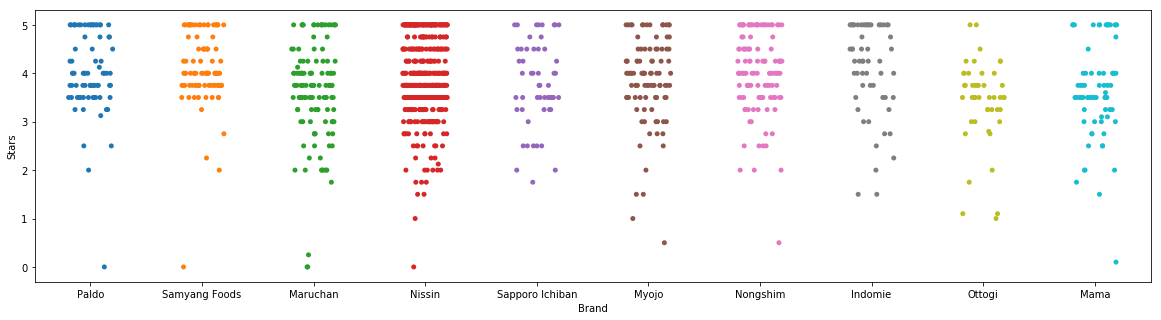

In [62]:
# Dataframe containing only reviews for the 10 brands most commonly reviewed
commonbrandsdf = df[df['Brand'].isin(brand_list)]

#Strip plot showing the distribution of ratings for each of the twn most commonly reviewed brands
plt.figure(figsize=(20,5))
viz = sns.stripplot(y='Stars', x='Brand', data=commonbrandsdf, jitter=0.2)


In [56]:
# Brands with best average rating, limiting to brands with top ten frequencies
brands = df['Brand'].value_counts()[:10]
branddf = pd.DataFrame(brands)

# These are the top 10 most commonly reviewed brands
brand_list = branddf.index.tolist()

# Dataframe containing only reviews for the 10 brands most commonly reviewed
commonbrandsdf = df[df['Brand'].isin(brand_list)]

# Calculating the average rating of each brand within this limited df
groupedcb = pd.to_numeric(commonbrandsdf['Stars']).groupby(commonbrandsdf['Brand'])
groupedcb.mean().sort_values(ascending=False)

Brand
Samyang Foods      4.095109
Indomie            4.089286
Paldo              4.016447
Nongshim           4.006637
Nissin             3.904076
Myojo              3.846354
Sapporo Ichiban    3.782407
Mama               3.628873
Maruchan           3.603125
Ottogi             3.414894
Name: Stars, dtype: float64

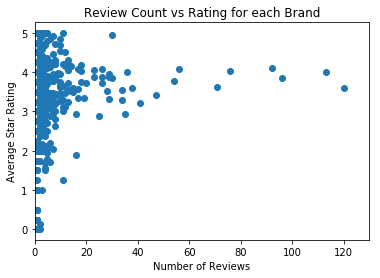

In [57]:
# Creating a Dataframe containing the average rating and number of reviews for each brand
grouped = pd.to_numeric(df['Stars']).groupby(df['Brand'])
avgrating = grouped.mean().sort_values(ascending=False)
counts = df['Brand'].value_counts()
freq_vs_rating = avgrating.to_frame().join(counts)
freq_vs_rating.rename(columns={'Brand':'Frequency'}, inplace=True)
freq_vs_rating.head()

# Plotting these values to a scatter plot to see the tendency for review count to influence average rating
plt.scatter(freq_vs_rating.Frequency, freq_vs_rating.Stars)
plt.xlim(0, 130)
plt.title('Review Count vs Rating for each Brand')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Star Rating')
plt.show()

## Do certain styles carry a higher rating than others?

In [58]:
# Average rating by style
groupedstyle = pd.to_numeric(df['Stars']).groupby(df['Style'])
groupedstyle.mean()

Style
Bar           5.000000
Bowl          3.708397
Box           4.390625
Can           3.500000
Cup           3.475759
Pack          3.760677
Restaurant    3.583333
Tray          3.527318
Name: Stars, dtype: float64

## What styles are being rated most within each brand? 

In [59]:
# Counts for each style of ramen within the top 10 most reviewed brands
grouped = commonbrandsdf.groupby(['Brand','Style'])['Style'].count()
print(grouped)

Brand            Style
Indomie          Box        1
                 Cup        6
                 Pack      49
Mama             Bowl       4
                 Cup       19
                 Pack      48
Maruchan         Bowl      37
                 Cup       28
                 Pack      36
                 Tray      19
Myojo            Bowl      31
                 Cup        7
                 Pack      41
                 Tray      17
Nissin           Bowl      85
                 Cup      204
                 Pack     139
                 Tray      32
Nongshim         Bowl      33
                 Cup       22
                 Pack      56
                 Tray       2
Ottogi           Bowl       8
                 Cup        7
                 Pack      32
Paldo            Bowl      18
                 Cup       11
                 Pack      42
                 Tray       5
Samyang Foods    Bowl      28
                 Cup        8
                 Pack      56
Sapporo Ichiban  

## Do different countries tend to rate things higher or lower?

In [60]:
# Average star rating for each country
groupedcountry = pd.to_numeric(df['Stars']).groupby(df['Country'])
groupedcountry.mean().sort_values(ascending=False)

Country
Spain             4.250000
Cambodia          4.200000
France            4.187500
Malaysia          4.166138
Indonesia         4.111842
Singapore         4.108456
Sarawak           4.000000
Myanmar           3.946429
Japan             3.916045
Fiji              3.875000
South Korea       3.859449
Taiwan            3.844587
Hong Kong         3.794025
Brazil            3.675000
Hungary           3.611111
Mexico            3.609375
Ukraine           3.583333
Dubai             3.583333
Finland           3.583333
Germany           3.580357
Holland           3.562500
Nepal             3.517857
United States     3.507603
Ghana             3.500000
Estonia           3.500000
Phlippines        3.500000
United Kingdom    3.500000
Bangladesh        3.479167
China             3.463364
Russia            3.450000
Thailand          3.414663
Philippines       3.382353
India             3.371951
Peru              3.333333
Colombia          3.291667
Australia         3.260000
Sweden            3.